In [1]:
import numpy as np

## Scalars

A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor).

In [2]:
x = np.array(12)

In [3]:
x

array(12)

In [4]:
# Display the number of axes of a Numpy tensor
x.ndim

0

## Vectors (1D tensors)

An array of numbers is called a vector, or 1D tensor

In [5]:
x = np.array([12, 3, 6, 14])

In [6]:
x

array([12,  3,  6, 14])

In [7]:
x.ndim

1

## Matrices (2D tensors)

An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns).

In [8]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])

In [9]:
x.ndim

2

The entries from the first axis are called the rows, and the entries from the second axis are called the columns. In the previous example, [5, 78, 2, 34, 0] is the first row of x, and [5, 6, 7] is the first column.

## 3D tensors and higher-dimensional tensors

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. Following is a Numpy 3D tensor:

In [10]:
x = np.array([
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ]
])

In [11]:
x.ndim

3

In [12]:
x.shape

(3, 3, 5)

3 matrices of 3 x 5

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


## Manipulating tensors in Numpy

Selecting specific elements in a tensor is called tensor slicing. The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28).

In [14]:
my_slice = train_images[10:100]

In [15]:
print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that ":" is equivalent to selecting the entire axis

In [16]:
my_slice = train_images[10:100, :, :]

In [17]:
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[10:100, 0:28, 0:28]

In [19]:
my_slice.shape

(90, 28, 28)

In general, you may select between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this :

In [20]:
my_slice = train_images[:, 14:, 14:]

In [21]:
my_slice.shape

(60000, 14, 14)

Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. We count since the end of the axis.

In [22]:
my_slice = train_images[:, 7:-7, 7:-7]

In [23]:
my_slice.shape

(60000, 14, 14)

## The notion of data batches

In general, the __first axis__ (axis 0, because indexing starts at 0) in all data tensors you’ll
come across in deep learning will be __the samples axis (sometimes called the samples dimension)__. In the MNIST example, samples are images of digits.

In addition, deep-learning models __don’t process an entire dataset at once__; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits,
with batch size of 128:

In [24]:
batch = train_images[:128]

In [25]:
# And here’s the next batch
batch = train_images[128:256]

In [26]:
# And the nth batch
# batch = train_images[128 * n : 128 * (n + 1)]

When considering such a batch tensor, the first axis (axis 0) is called the __batch axis__ or __batch dimension__. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

## Real-world examples of data tensors

Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:

* __Vector data__ — 2D tensors of shape (samples, features)
* __Timeseries data or sequence data__ — 3D tensors of shape (samples, timesteps, features)
* __Images__ — 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
* __Video__ — 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## Vector data

This is the most common case. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of vectors), where the first axis is the __samples axis__ and the second axis is the __features axis__.

## Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor (see figure below).

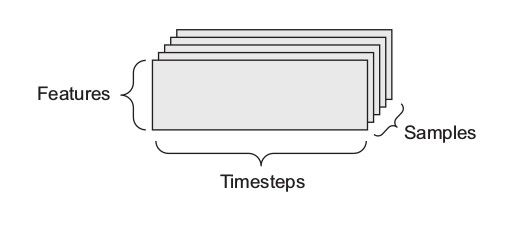

The __time axis__ is __always the second axis__ (axis of index 1), __by convention__. Let’s look at a few examples :
* A dataset of stock prices. Every minute, we store the current price of the stock,the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.
* A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

## Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a one dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)

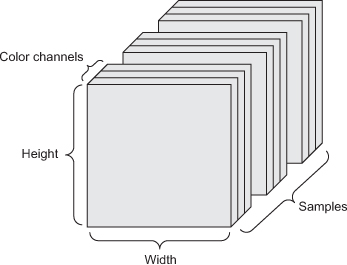

There are two conventions for shapes of images tensors: the channels-last convention (used by TensorFlow) and the channels-first convention (used by Theano). The TensorFlow machine-learning framework, from Google, places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the Theano convention, the previous examples would become (128, 1, 256, 256)
and (128, 3, 256, 256). The Keras framework provides support for both formats.

## Video data

Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth).

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).